In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.losses import MeanSquaredError

dataWoBlst = pd.read_csv(r"C:\Users\MNT\Desktop\OCL_DEMO\GitHub\RadioCoverage\PythonNotebookFiles\MoneMLDataWoBlst.csv")
dataWBlst = pd.read_csv(r"C:\Users\MNT\Desktop\OCL_DEMO\GitHub\RadioCoverage\PythonNotebookFiles\MoneMLDataWBlst.csv", delimiter=',', skiprows=0, low_memory=False)

In [3]:
dataWBlst.head()

,Time,Lat,Long,PCI__PCell_,SS_RSRP__PCell_,SS_RSRQ__PCell_,SS_SINR__PCell_,Blst_Longitude,Blst_Latitude
0,2024-12-10 10:41:23.247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-12-10 10:41:23.247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-12-10 10:41:23.247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-12-10 10:41:23.247,NaN,NaN,612.0,NaN,NaN,NaN,NaN,NaN
4,2024-12-10 10:41:23.247,NaN,NaN,612.0,NaN,NaN,NaN,NaN,NaN


In [4]:
dataWoBlst.head()
dataWBlst.head()

dataWBlst_cleaned = dataWBlst.dropna()
[len(dataWBlst), len(dataWBlst_cleaned)]

dataWoBlst_cleaned = dataWoBlst.dropna()
[len(dataWoBlst), len(dataWoBlst_cleaned)]

[46086, 43718]

Mean Squared Error: 2.731615879753022
R-squared: 0.9853029048820561


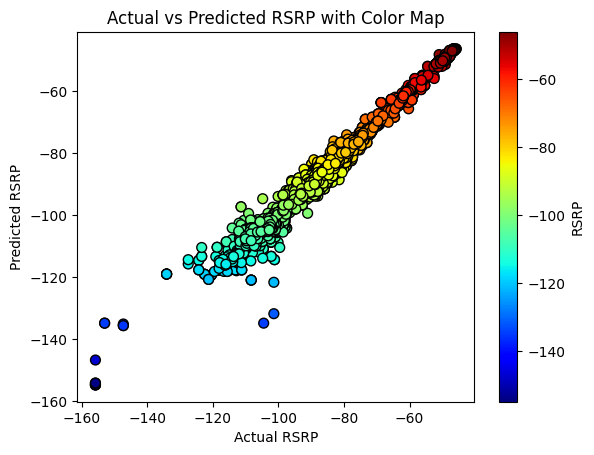

In [9]:
# RandomForestRegressor - DataWoBlst
X = dataWoBlst_cleaned[['Lat', 'Long', 'PCI__PCell_']]
y = dataWoBlst_cleaned['SS_RSRP__PCell_']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)  # place 100 trees
model.fit(X_train, y_train)

# predict using model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# scatter plot actual vs predicted with color mapping based on RSRP - if model is good, we can see some correlation
scatter = plt.scatter(y_test, y_pred, c=y_pred, cmap='jet', s=50, edgecolors="k")

# Add a color bar to rerpesent the RSRP value range
plt.colorbar(scatter, label='RSRP')

# Add labels and title
plt.xlabel('Actual RSRP')
plt.ylabel('Predicted RSRP')
plt.title('Actual vs Predicted RSRP with Color Map')
plt.show()

# do 56% 

Mean Squared Error: 2.6351211391768037
R-squared: 0.9810118571735414


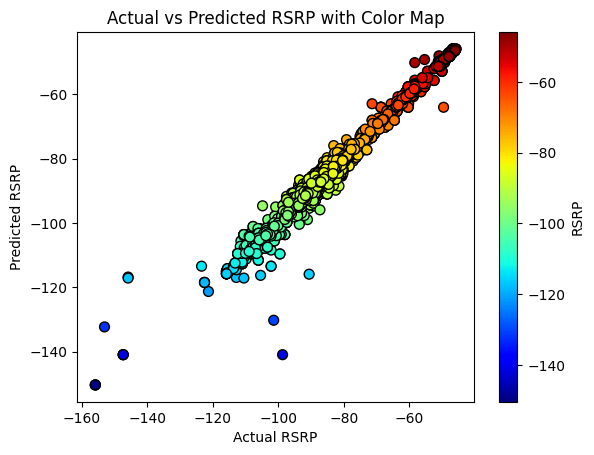

In [10]:
# RandomForestRegressor - DataWBlst
X = dataWBlst_cleaned[['Lat', 'Long', 'Blst_Longitude', 'Blst_Latitude', 'PCI__PCell_']]
y = dataWBlst_cleaned['SS_RSRP__PCell_']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)  # place 100 trees
model.fit(X_train, y_train)

# predict using model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# scatter plot actual vs predicted with color mapping based on RSRP - if model is good, we can see some correlation
scatter = plt.scatter(y_test, y_pred, c=y_pred, cmap='jet', s=50, edgecolors="k")

# Add a color bar to rerpesent the RSRP value range
plt.colorbar(scatter, label='RSRP')

# Add labels and title
plt.xlabel('Actual RSRP')
plt.ylabel('Predicted RSRP')
plt.title('Actual vs Predicted RSRP with Color Map')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

# Feedfoward neural network - DataWoBlst
X = dataWoBlst_cleaned[['Lat', 'Long', 'PCI__PCell_']]
y = dataWoBlst_cleaned['SS_RSRP__PCell_']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

#model.compile(optimizer=Adam(),
  #            loss=MeanSquaredError(),
   #           metrics=['mse'])

model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=['mse'])


model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.3)

test_loss, test_mse = model.evaluate(X_test_scaled, y_test)
print(f'\nTest MSE: {test_mse}')

Epoch 1/10
670/670 [==============================] - 3s 3ms/step - loss: 593.8530 - mse: 593.8530 - val_loss: 60.2349 - val_mse: 60.2349
Epoch 2/10
670/670 [==============================] - 2s 3ms/step - loss: 46.6046 - mse: 46.6046 - val_loss: 39.6899 - val_mse: 39.6899
Epoch 3/10
670/670 [==============================] - 1s 2ms/step - loss: 34.1991 - mse: 34.1991 - val_loss: 29.1079 - val_mse: 29.1079
Epoch 4/10
670/670 [==============================] - 1s 2ms/step - loss: 25.7263 - mse: 25.7263 - val_loss: 24.5319 - val_mse: 24.5319
Epoch 5/10
670/670 [==============================] - 2s 2ms/step - loss: 22.1151 - mse: 22.1151 - val_loss: 21.3592 - val_mse: 21.3592
Epoch 6/10
670/670 [==============================] - 2s 3ms/step - loss: 20.6261 - mse: 20.6261 - val_loss: 19.3993 - val_mse: 19.3993
Epoch 7/10
670/670 [==============================] - 1s 2ms/step - loss: 19.5442 - mse: 19.5442 - val_loss: 19.6670 - val_mse: 19.6670
Epoch 8/10
670/670 [==========================

410/410 [==============================] - 1s 1ms/step


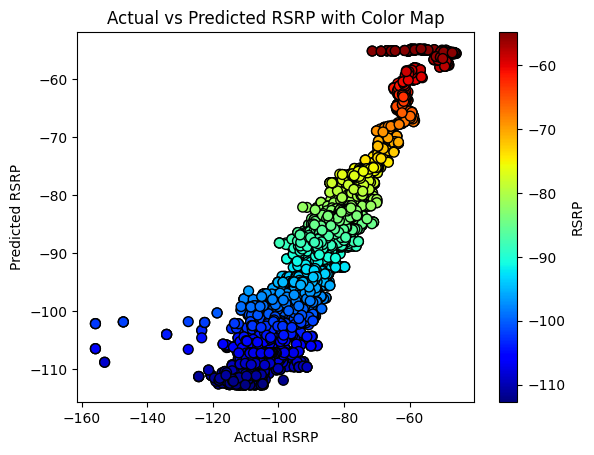

In [16]:
# scatter plot actual vs predicted with color mapping based on RSRP - if model is good, we can see some correlation
y_pred = model.predict(X_test_scaled)
scatter = plt.scatter(y_test, y_pred, c=y_pred, cmap='jet', s=50, edgecolors="k")

# Add a color bar to rerpesent the RSRP value range
plt.colorbar(scatter, label='RSRP')

# Add labels and title
plt.xlabel('Actual RSRP')
plt.ylabel('Predicted RSRP')
plt.title('Actual vs Predicted RSRP with Color Map')
plt.show()

In [13]:
X_test_scaled

array([[-0.27375517, -0.76248278, -1.2178558 ],
       [-0.47639979, -1.45251878, -0.06318334],
       [ 1.54974368,  1.4922844 ,  0.73620528],
       ...,
       [-0.95464594, -0.97950368, -0.06318334],
       [-0.30844754,  0.19769844,  0.74303766],
       [-0.88725918,  0.05294051, -0.02902143]])

In [ ]:
# Chen Lei - 3/2/25 work
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units_1', min_value=128, max_value=512, step=64), activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(hp.Int('units_2', min_value=64, max_value=256, step=32), activation='relu'))
    
    model.add(Dense(hp.Int('units_3', min_value=32, max_value=256, step=16), activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
                  loss='mse', metrics=['mse'])
    
    return model

tuner = kt.RandomSearch(build_model,
                        objective='val_mse',
                        max_trials=10,
                        executions_per_trial=2, # Run each configuration twice for stability
                        directory='tuner_results',
                        project_name='mse_tuning',) 

tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2)


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best units for first layer: {best_hps.get('units_1')}")
print(f"Best units for second layer: {best_hps.get('units_2')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")


# Build the model using the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
best_model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2)

# Evaluate the final model on the test set
test_loss, test_mse = best_model.evaluate(X_test_scaled, y_test)
print(f'\nFinal Test MSE: {test_mse}')

### LSTM model

In [57]:
# Load the dataset
file_path = r"C:\Users\MNT\Desktop\OCL_DEMO\GitHub\RadioCoverage\PythonNotebookFiles\MoneMLDataWBlst.csv"
df = pd.read_csv(file_path, delimiter=',', skiprows=0, low_memory=False)

# Remove columns that are completely NaN
df_cleaned = df.dropna(axis=1, how='all')

# Remove rows that are completely NaN
df_cleaned = df_cleaned.dropna(axis=0, how='all')

# Drop columns where more than 50% of the values are NaN
threshold = len(df_cleaned) * 0.5  # 50% threshold
df_cleaned = df_cleaned.dropna(axis=1, thresh=threshold)

# Fill remaining NaN values with forward fill (optional)
df_cleaned = df_cleaned.fillna(method='ffill')

# Save the cleaned dataset (optional)
# df_cleaned.to_csv("cleaned_dataset.csv", index=False)

print("Data cleaning completed. Cleaned dataset is ready for LSTM.")


Data cleaning completed. Cleaned dataset is ready for LSTM.


C:\Users\MNT\AppData\Local\Temp\ipykernel_33628\2153197436.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df_cleaned.fillna(method='ffill')


In [59]:
# Select relevant features for LSTM
features = ['Lat', 'Long', 'PCI__PCell_', 'SS_RSRP__PCell_', 'SS_RSRQ__PCell_', 'SS_SINR__PCell_']
target_kpi = "SS_RSRP__PCell_"  # Example: Predict only RSRP


# Drop rows with missing values in selected features
df_lstm = df_cleaned[features].dropna()

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_lstm)

# Reshape into LSTM format (samples, time steps, features)
X = []
y = []
time_steps = 10  # Define the window size

for i in range(len(df_scaled) - time_steps):
    X.append(df_scaled[i:i + time_steps])  # Input sequence
    #y.append(df_scaled[i + time_steps])    # Target (next step prediction)
    y.append(df_scaled[i + time_steps][features.index(target_kpi)])  # Output: only RSRP


X, y = np.array(X), np.array(y)

print("LSTM Input Shape:", X.shape)  # Should be (samples, time_steps, features)

LSTM Input Shape: (46060, 10, 6)


In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(time_steps, len(features))),
    Dropout(0.2),  
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),  # Added relu for better learning
    #Dense(len(features))  # Output layer must match y_test
    Dense(1)  # Predicting ONE KPI
])

optimizer = Adam(learning_rate=0.0005)  # Lower learning rate prevents unstable updates, default is 0.001
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Model Summary
model.summary()

C:\Users\MNT\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 10, 128)             │          69,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120,641 (471.25 KB)

 Trainable params: 120,641 (471.25 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Ensure proper train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/50
2303/2303 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.0100 - val_loss: 7.5899e-04
Epoch 2/50
2303/2303 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 9.1111e-04 - val_loss: 6.1241e-04
Epoch 3/50
2303/2303 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 5.5125e-04 - val_loss: 3.5485e-04
Epoch 4/50
2303/2303 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 4.0765e-04 - val_loss: 1.6849e-04
Epoch 5/50
2303/2303 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 3.0385e-04 - val_loss: 1.4711e-04
Epoch 6/50
2303/2303 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 2.6631e-04 - val_loss: 1.7455e-04
Epoch 7/50
2303/2303 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 2.7042e-04 - val_loss: 2.3163e-04
Epoch 8/50
2303/2303 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 2.2876e-04 - val_loss: 1.4851e-04
Epoch 9/50
2303/2303 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 2.3900e-04 - val_loss: 3.4741e-04
Epoch 10/50
2303/2303 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 2.2163e-04 - val_loss: 2.5691e-04
Epoch 11/50
2303/2303 ━━━━━━━━━━━

In [64]:
from sklearn.metrics import mean_squared_error

# Predictions from LSTM model
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")

288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Squared Error (MSE): 0.00014710772281625357


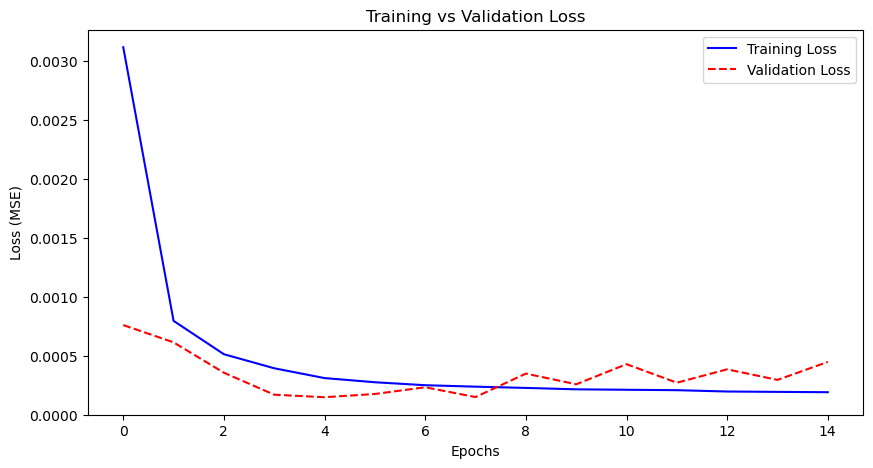

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="red", linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()